#  Assignment4

### Siyi Fan

# Question1

In [1]:
# Import initial packages
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from scipy import stats
import matplotlib.mlab as mlab

In [2]:
# Define the parameters, structured as a dictionary  
p = {
        'sd'          : 0.1,         #standard deviation
        'r'           : 0.2,         #persistence
        'g'           : 0.03,        #growth rate
        'inc_0'       : 80000,       #inivital income
        'num_years'   : 40,          #years to work
        'mean'        : 0,           #mean 
        'num_draws'   : 10000,       #simulations
        'st_year'     : 2019         #start year
     }
 

In [3]:
# Import initial packages
def income_sim(p):
    #set random seed 
    np.random.seed(524)
    normal_errors = np.random.normal(p['mean'], p['sd'], (p['num_years'], p['num_draws']))
    #create a matrix of dim (num_years, num_draws)
    ln_income_mat = np.zeros((p['num_years'], p['num_draws']))
    #fill the matrix
    ln_income_mat[0, :] = np.log(p['inc_0']) + normal_errors[0, :]
    #loop and apply model
    for yr in range (1,p['num_years']):
        ln_income_mat[yr, :] = ((1 - p['r']) * (np.log(p['inc_0']) + p['g']*(yr))) + p['r']*ln_income_mat[yr-1, :] + normal_errors [yr, :]
    income_mat = np.exp(ln_income_mat)
    return income_mat

In [4]:
income_mat = income_sim(p)

Text(0,0.5,'Annual income (\\$s)')

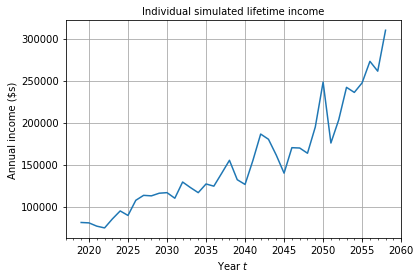

In [5]:
%matplotlib inline
year_vec = np.arange(p['st_year'], p['st_year'] + p['num_years'])
individual = 1000
fig, ax = plt.subplots()
plt.plot(year_vec, income_mat[:, individual])
minorLocator = MultipleLocator(1)
ax.xaxis.set_minor_locator(minorLocator)
plt.grid(b=True, which='major', color='0.65', linestyle='-')
plt.title('Individual simulated lifetime income', fontsize=10)
plt.xlabel(r'Year $t$')
plt.ylabel(r'Annual income (\$s)')

# Question2

In [6]:
start_income = income_mat[0, :]
mean = np.mean(start_income)
sd = np.sqrt(np.var(start_income))

Text(0,0.5,'Density')

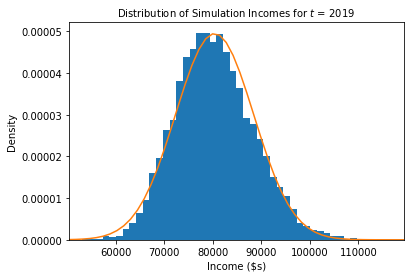

In [7]:
%matplotlib inline
plt.hist(start_income, 50, normed = True)
plt.xlim((min(start_income)), max(start_income))
x = np.linspace(min(start_income), max(start_income), 50)
plt.plot(x, mlab.normpdf(x, mean, sd))
plt.title('Distribution of Simulation Incomes for $t$ = 2019', fontsize = 10)
plt.xlabel(r'Income (\$s)')
plt.ylabel(r'Density')

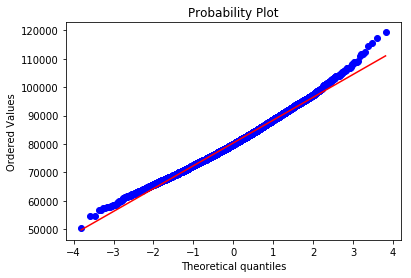

In [8]:
# Check if it is normally distributed by generating Q-Q plot
import pylab 
measurements = start_income   
stats.probplot(measurements, dist="norm",plot=pylab)
pylab.show()

It looks like a normal distribution. 

In [9]:
stats.percentileofscore(start_income, 70000)

9.0199999999999996

In [10]:
100 - stats.percentileofscore(start_income, 100000)

1.2700000000000102

Therefore, around 9.02% of students have an annual income less than
70000, and 1.27% of students have an annual income more than 10000. 

# Question3

In [11]:
# Years to pay off $95,000 in 10,000 simulations
debt_mat = np.zeros((p['num_draws']))
debt = 95000
percentile = 0.1
    
for i in range (p['num_draws']):
    current_debt = debt
    for yr in range (p['num_years']):
        current_debt -= percentile * income_mat[yr,i]
        if current_debt <= 0:
            debt_mat[i] = yr + p['st_year']
            break

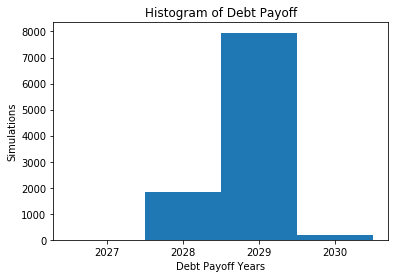

In [12]:
# Plot the histogram 
bins = np.arange(min(debt_mat) - 0.5, max(debt_mat) + 1 )
plt.hist(debt_mat, bins)
plt.title('Histogram of Debt Payoff')
plt.xlabel(r'Debt Payoff Years')
plt.ylabel(r'Simulations')
plt.xticks(np.arange(debt_mat.min(), debt_mat.max() + 1))
plt.show()

In [13]:
# Percentage
Percentage = np.mean(debt_mat <= 2028)
print(Percentage*100)

18.47


Therefore, around 18.47% of students are able to pay off the loan in 10 years. 

# Question4

In [14]:
# Define new parameters, structured as a dictionary
p2 = {
        'sd'          : 0.15,        #standard deviation
        'r'           : 0.2,         #persistence
        'g'           : 0.03,        #growth rate
        'inc_0'       : 85000,       #inivital income
        'num_years'   : 40,          #years to work
        'mean'        : 0,           #mean 
        'num_draws'   : 10000,       #simulations
        'st_year'     : 2019         #start year
     }

income_mat_2 = income_sim(p2)

In [15]:
# Years to pay off $95,000 in this new 10,000 simulations
debt_mat_2 = np.zeros((p['num_draws']))
debt = 95000
percentile = 0.1
    
for i in range (p['num_draws']):
    current_debt = debt
    for yr in range (p['num_years']):
        current_debt -= percentile * income_mat_2[yr,i]
        if current_debt <= 0:
            debt_mat_2[i] = yr + p['st_year']
            break

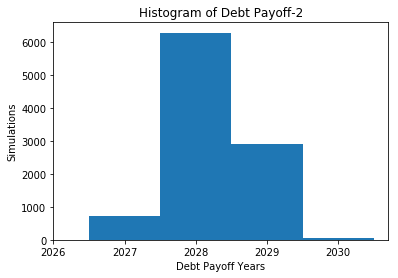

In [16]:
# Plot the new histogram 
bins = np.arange(min(debt_mat) - 0.5, max(debt_mat) + 1 )
plt.hist(debt_mat_2, bins)
plt.title('Histogram of Debt Payoff-2')
plt.xlabel(r'Debt Payoff Years')
plt.ylabel(r'Simulations')
plt.xticks(np.arange(debt_mat_2.min(), debt_mat_2.max() + 1))
plt.show()

In [17]:
# New percentage
Percentage_2 = np.mean(debt_mat_2 <= 2028)
print(Percentage_2 *100)

70.2


Therefore, around 70.2% of students are able to pay off the loan in 10 years.